In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold 
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm




In [4]:
df= pd.read_csv(r"C:\Users\shruti sharma\Desktop\Unified Mentor\WildBlueberryPollinationSimulationData.csv")

In [5]:
df.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [7]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


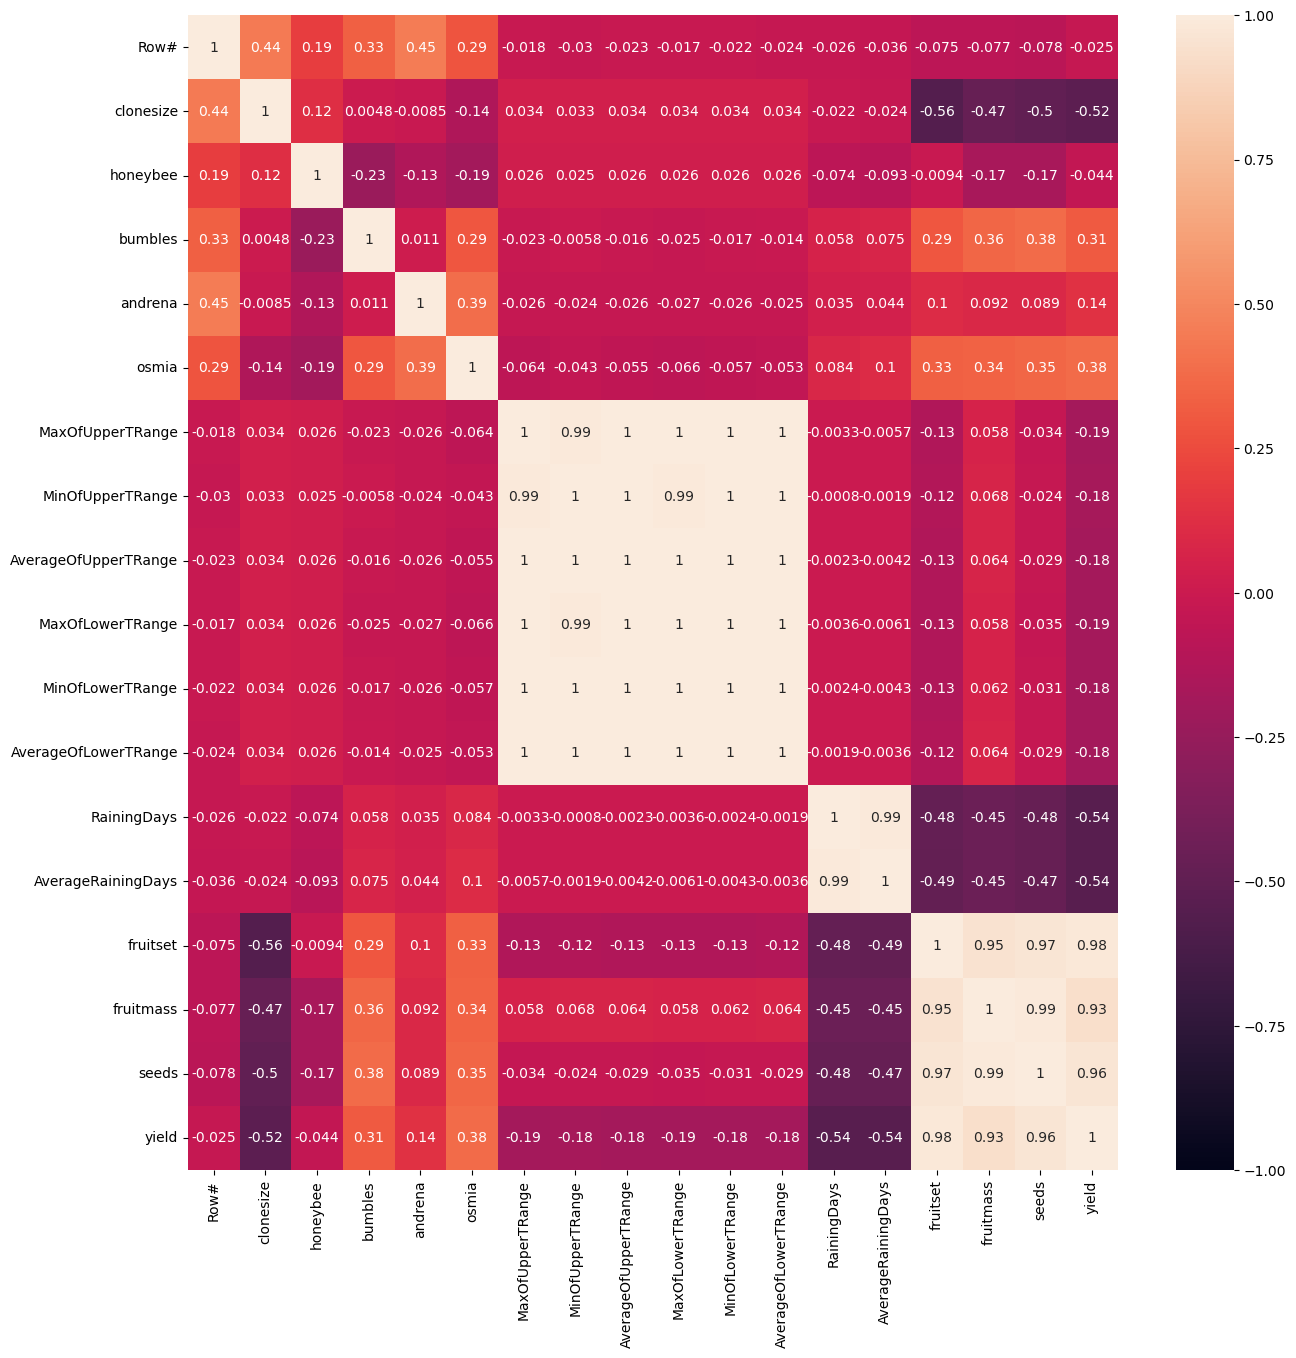

In [8]:
# create featureset and target variable from the dataset
features_df = df.drop('yield', axis=1)
tar = df['yield']

# plot the heatmap from the dataset
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

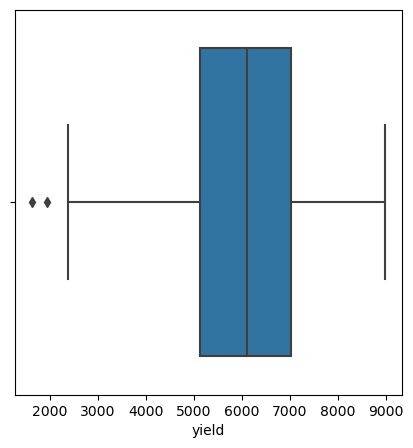

In [9]:
# plot the boxplot using seaborn library of the target variable 'yield'
plt.figure(figsize=(5,5))
sns.boxplot(x='yield', data=df)
plt.show()

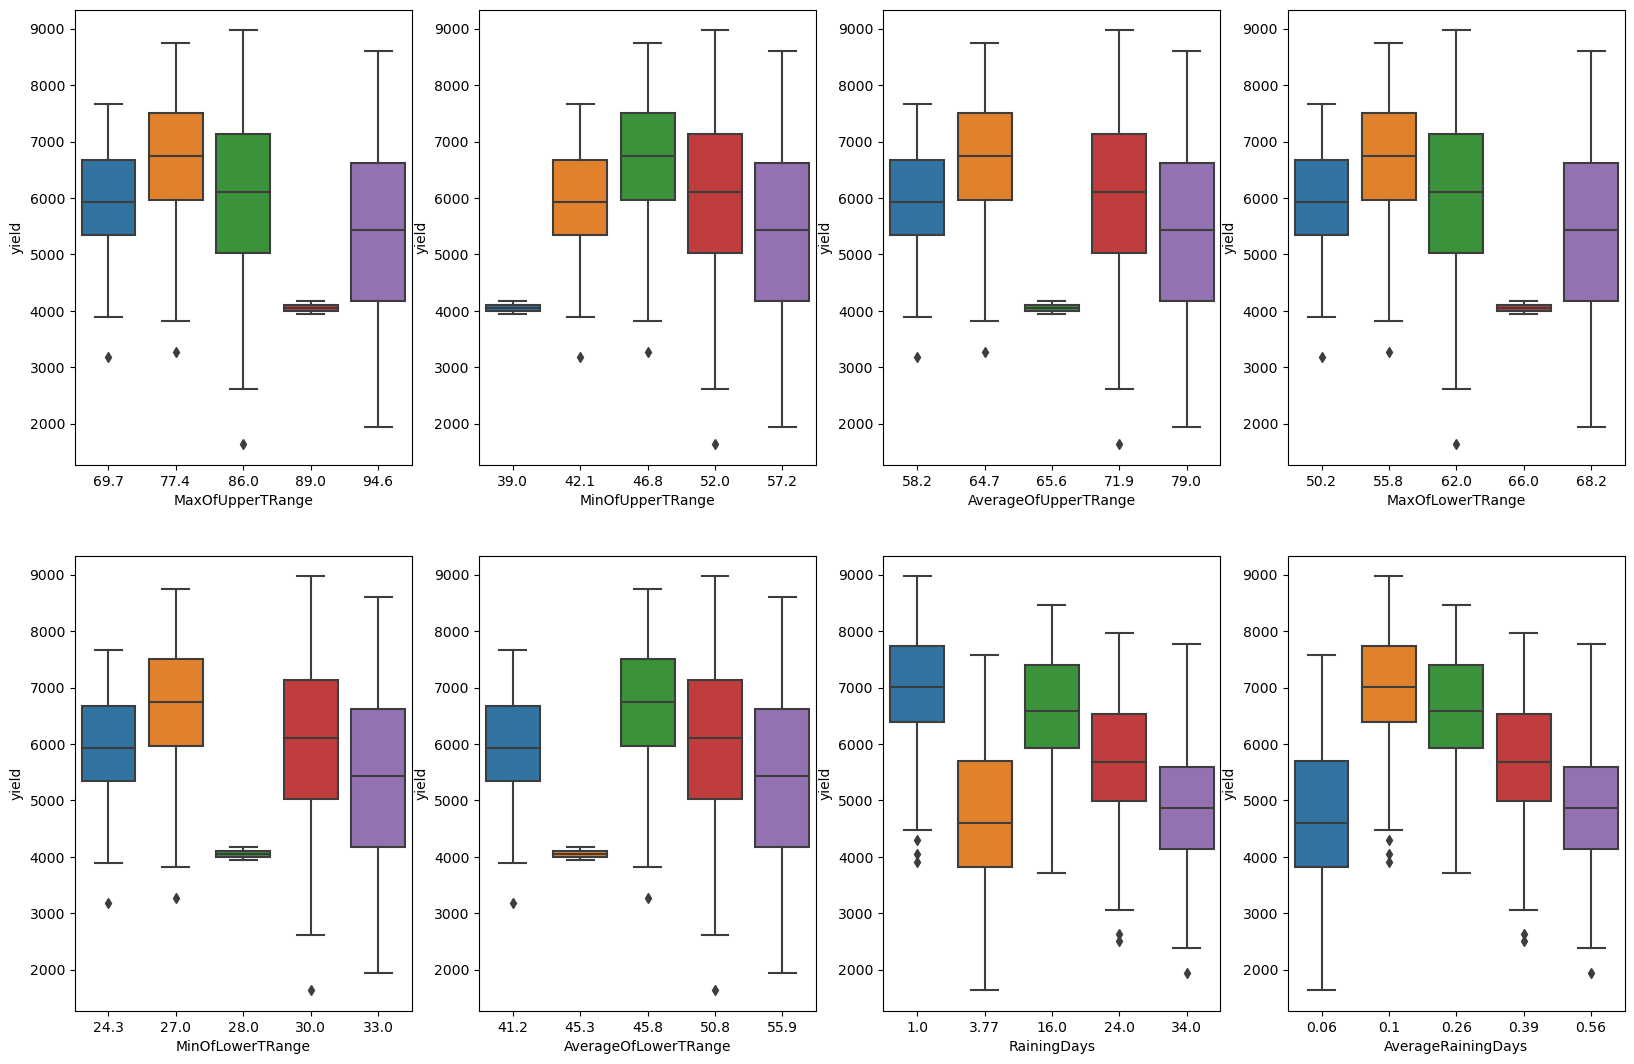

In [10]:
# matplotlib subplot for the categorical feature 
nominal_df = df[['MaxOfUpperTRange','MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange',
               'MinOfLowerTRange','AverageOfLowerTRange','RainingDays','AverageRainingDays']]

fig, ax = plt.subplots(2,4, figsize=(20,13))
for e, col in enumerate(nominal_df.columns):
    if e<=3:
        sns.boxplot(data=df, x=col, y='yield', ax=ax[0,e])
    else:
        sns.boxplot(data=df, x=col, y='yield', ax=ax[1,e-4])       
plt.show()

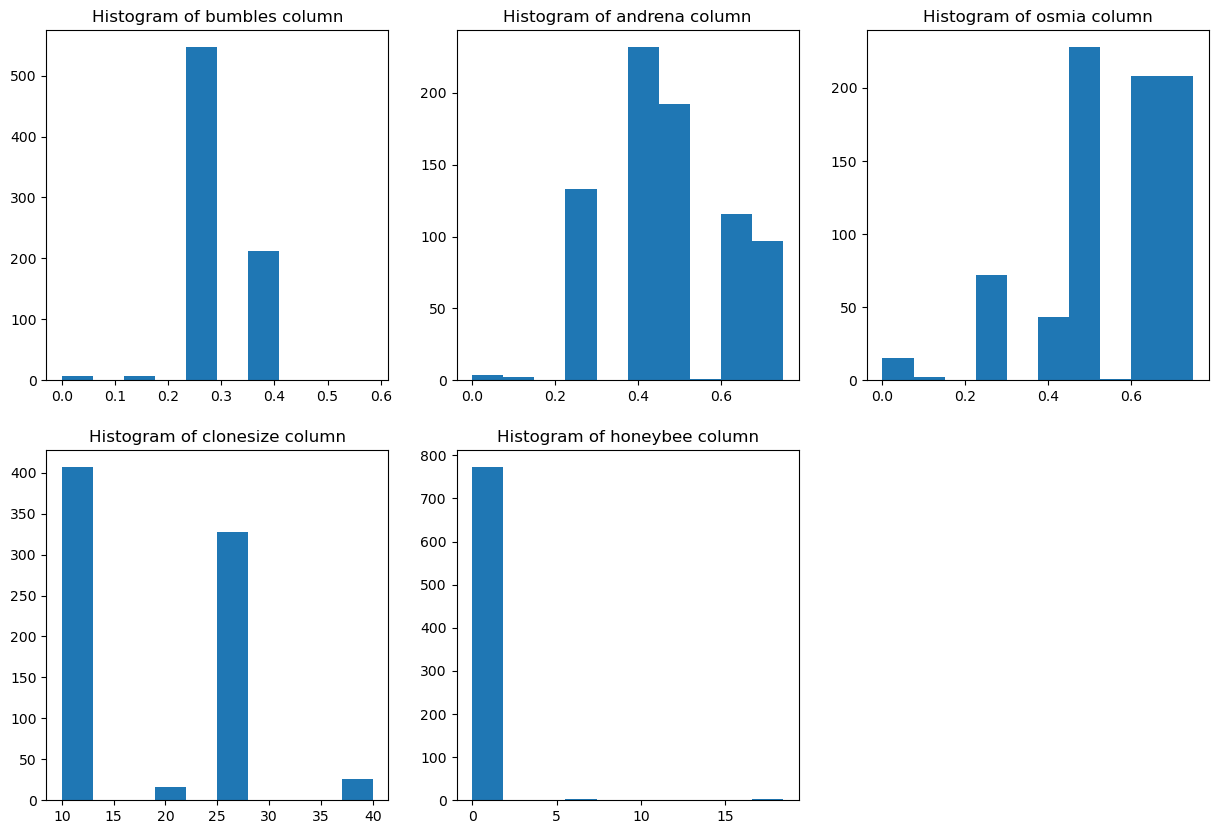

In [11]:
# matplotlib subplot technique to plot distribution of bees in our dataset
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.hist(df['bumbles'])
plt.title("Histogram of bumbles column")
plt.subplot(2,3,2)
plt.hist(df['andrena'])
plt.title("Histogram of andrena column")
plt.subplot(2,3,3)
plt.hist(df['osmia'])
plt.title("Histogram of osmia column")
plt.subplot(2,3,4)
plt.hist(df['clonesize'])
plt.title("Histogram of clonesize column")
plt.subplot(2,3,5)
plt.hist(df['honeybee'])
plt.title("Histogram of honeybee column")
plt.show()

In [12]:
# run the MI scores of the dataset
mi_score = mutual_info_regression(features_df, tar, n_neighbors=3,random_state=42)
mi_score_df = pd.DataFrame({'columns':features_df.columns, 'MI_score':mi_score})
mi_score_df.sort_values(by='MI_score', ascending=False)

,columns,MI_score
14,fruitset,1.948853
16,seeds,1.664007
15,fruitmass,1.588506
0,Row#,0.260477
12,RainingDays,0.216674
13,AverageRainingDays,0.214281
1,clonesize,0.180616
9,MaxOfLowerTRange,0.125254
6,MaxOfUpperTRange,0.124536
11,AverageOfLowerTRange,0.123363


In [13]:
# clustering using kmeans algorithm
X_clus = features_df[['honeybee','osmia','bumbles','andrena']]

# standardize the dataset using standard scaler
scaler = StandardScaler()
scaler.fit(X_clus)
X_new_clus = scaler.transform(X_clus)

# K means clustering 
clustering = KMeans(n_clusters=3, random_state=42)
clustering.fit(X_new_clus)
n_cluster = clustering.labels_

# add new feature to feature_Df 
features_df['n_cluster'] = n_cluster
df['n_cluster'] = n_cluster
features_df['n_cluster'].value_counts()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


0    580
1    195
2      2
Name: n_cluster, dtype: int64

In [14]:
features_set = ['AverageRainingDays','clonesize','AverageOfLowerTRange',
               'AverageOfUpperTRange','honeybee','osmia','bumbles','andrena','n_cluster']

# final dataframe  
X = features_df[features_set]
y = tar.round(1)

# train and test dataset to build baseline model using GBT and RFs by scaling the dataset
mx_scaler = MinMaxScaler()
X_scaled = pd.DataFrame(mx_scaler.fit_transform(X))
X_scaled.columns = X.columnss

In [15]:
# let's fit the data to the models lie adaboost, gradientboost and random forest
model_dict = {"abr": AdaBoostRegressor(), 
              "gbr": GradientBoostingRegressor(), 
              "rfr": RandomForestRegressor()
             }

# Cross value scores of the models
for key, val in model_dict.items():
    print(f"cross validation for {key}")
    score = cross_val_score(val, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mean_score = -np.sum(score)/5
    sqrt_score = np.sqrt(mean_score) 
    print(sqrt_score)

cross validation for abr
751.9541923151332
cross validation for gbr
543.4536516024515
cross validation for rfr
609.363150939961


In [16]:
# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# gradient boosting regressor modeling
bgt = GradientBoostingRegressor(random_state=42)
bgt.fit(X_train,y_train)
preds = bgt.predict(X_test)
score = bgt.score(X_train,y_train)
rmse_score = np.sqrt(mean_squared_error(y_test, preds))
r2_score = r2_score(y_test, preds)
print("RMSE score gradient boosting machine:", rmse_score)      
print("R2 score for the model: ", r2_score)

RMSE score gradient boosting machine: 376.44242747439523
R2 score for the model:  0.9270904949652098


In [17]:
# K-fold split the dataset
kf = KFold(n_splits = 5, shuffle=True, random_state=0)

# params grid for tuning the hyperparameters
param_grid = {'n_estimators': [100,200,400,500,800],
             'learning_rate': [0.1,0.05,0.3,0.7],
             'min_samples_split': [2,4],
             'min_samples_leaf': [0.1,0.4],
             'max_depth': [3,4,7]
             }

# GBR estimator object 
estimator = GradientBoostingRegressor(random_state=42)

# Grid search CV object 
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kf, 
                   scoring='neg_mean_squared_error', n_jobs=-1)
clf.fit(X_scaled,y)

# print the best the estimator and params
best_estim = clf.best_estimator_
best_score = clf.best_score_
best_param = clf.best_params_
print("Best Estimator:", best_estim)
print("Best score:", np.sqrt(-best_score))

Best Estimator: GradientBoostingRegressor(max_depth=4, min_samples_leaf=0.1, n_estimators=800,
                          random_state=42)
Best score: 307.04061892634877
